Service Provide

    Identity ->
    
        authentication -> username, password
        
        authorization -> access to content
    

In [1]:
api_key = "390cfe9366e31568d802a3982999caab"

    URL => https://domain_name.com/resource/path?query=parameters&to=feachdata&api_key=askldjfsdffds

In [16]:
import requests

api_key = "390cfe9366e31568d802a3982999caab"

city_name = input("city name: ")
geo_url = f"http://api.openweathermap.org/geo/1.0/direct?q={city_name}&appid={api_key}"

resp = requests.get(geo_url)
resp.status_code


city name: delhi


200

In [17]:
from pprint import pprint

In [23]:
pprint(data)

[{'country': 'IN',
  'lat': 28.6517178,
  'local_names': {'ar': 'دلهي',
                  'bn': 'দিল্লি',
                  'cs': 'Dillí',
                  'de': 'Delhi',
                  'el': 'Δελχί',
                  'en': 'Delhi',
                  'eo': 'Delhio',
                  'es': 'Delhi',
                  'fa': 'دهلی',
                  'fr': 'Delhi',
                  'he': 'דלהי',
                  'hi': 'दिल्ली',
                  'ja': 'デリー',
                  'kn': 'ದೆಹಲಿ',
                  'ko': '델리',
                  'ku': 'Delhî',
                  'lv': 'Deli',
                  'ml': 'ഡെൽഹി',
                  'ms': 'Delhi',
                  'my': 'ဒေလီမြို့',
                  'ne': 'दिल्ली',
                  'oc': 'Delhi',
                  'pa': 'ਦਿੱਲੀ',
                  'pt': 'Deli',
                  'ru': 'Дели',
                  'ta': 'தில்லி',
                  'te': 'ఢిల్లీ',
                  'th': 'เดลี',
                  'uk': 'Делі',
      

In [32]:
def get_lat_lon(city_name):
    """
        will return a dictionary having latitude and longitude info
    """
    api_key = "390cfe9366e31568d802a3982999caab"
    geo_url = f"http://api.openweathermap.org/geo/1.0/direct?q={city_name}&appid={api_key}"

    resp = requests.get(geo_url)

    if resp.status_code == 200:
        data = resp.json()
        if len(data) >= 1 and len(data[0]) >= 3:
            answer = {}
            answer["country"] = data[0]['country']
            answer["state"] = data[0]['state']
            if 'local_names' in data[0].keys():
                answer["name"] = data[0]['local_names']['hi']
            else:
                answer["name"] = data[0]['name']
            answer["lat"] = data[0]['lat']
            answer["lon"] = data[0]['lon']
            return answer
        else:
            print("Could not Get Data")
    else:
        print(f"Invalid Request! {resp.status_code}, {resp.reason}")
    return False

In [33]:
get_lat_lon("jaipur")

{'country': 'IN',
 'state': 'Rajasthan',
 'name': 'जयपुर',
 'lat': 26.9154576,
 'lon': 75.8189817}

In [34]:
get_lat_lon("new york")

{'country': 'US',
 'state': 'New York',
 'name': 'न्यूयॊर्क्',
 'lat': 40.7127281,
 'lon': -74.0060152}

In [53]:
def get_temp(city_name):
    """
        will return temprature dictionary of city_name
    """
    info = get_lat_lon(city_name)
    api_key = "390cfe9366e31568d802a3982999caab"
    url = "https://api.openweathermap.org/data/2.5/weather"    
    if info:
        query_parameters = {
            "lat": info['lat'],
            "lon": info['lon'],
            "appid": api_key,
            "units": "metric"
        }
        resp = requests.get(url, params=query_parameters)
        if resp.status_code == 200:
            data = resp.json()
            if len(data) >= 3:
                info["desc"] = data["weather"][0]["description"]
                info["icon"] = data["weather"][0]["icon"]
                info["icon_url"] = f"https://openweathermap.org/img/wn/{icon}@4x.png"
                info["temp"] = data["main"]["temp"]
                info["humidity"] = data["main"]['humidity']
                return info
            else:
                print("no weather information available")
        else:
            print(f"Could not fetch temprature! {resp.status_code} {resp.reason}")
    else:
        print("!Could Not get Lat and Lon, Please check location properly!")
    return False

In [39]:
resp.status_code

200

In [40]:
resp.headers["Content-type"]

'application/json; charset=utf-8'

In [41]:
data = resp.json()

In [43]:
from IPython.display import Image

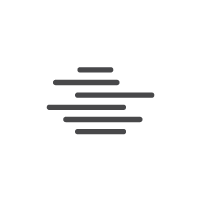

In [44]:
icon_url = "https://openweathermap.org/img/wn/{}@4x.png"
Image(icon_url)

In [52]:

info["desc"] = data["weather"][0]["description"]
info["icon"] = data["weather"][0]["icon"]
info["icon_url"] = f"https://openweathermap.org/img/wn/{icon}@4x.png"
info["temp"] = data["main"]["temp"]
info["humidity"] = data["main"]['humidity']

In [42]:
data

{'coord': {'lon': 75.819, 'lat': 26.9155},
 'weather': [{'id': 721,
   'main': 'Haze',
   'description': 'haze',
   'icon': '50d'}],
 'base': 'stations',
 'main': {'temp': 28.6,
  'feels_like': 35.49,
  'temp_min': 28.6,
  'temp_max': 28.6,
  'pressure': 1005,
  'humidity': 89},
 'visibility': 4000,
 'wind': {'speed': 4.12, 'deg': 310},
 'clouds': {'all': 75},
 'dt': 1659414302,
 'sys': {'type': 1,
  'id': 9170,
  'country': 'IN',
  'sunrise': 1659399683,
  'sunset': 1659447871},
 'timezone': 19800,
 'id': 1269515,
 'name': 'Jaipur',
 'cod': 200}

In [56]:
def get_lat_lon(city_name):
    """
        will return a dictionary having latitude and longitude info
    """
    api_key = "390cfe9366e31568d802a3982999caab"
    geo_url = f"http://api.openweathermap.org/geo/1.0/direct?q={city_name}&appid={api_key}"
    resp = requests.get(geo_url)
    if resp.status_code == 200:
        data = resp.json()
        if len(data) >= 1 and len(data[0]) >= 3:
            answer = {}
            answer["country"] = data[0]['country']
            answer["state"] = data[0]['state']
            if 'local_names' in data[0].keys():
                answer["name"] = data[0]['local_names']['hi']
            else:
                answer["name"] = data[0]['name']
            answer["lat"] = data[0]['lat']
            answer["lon"] = data[0]['lon']
            return answer
        else:
            print("Could not Get Data")
    else:
        print(f"Invalid Request! {resp.status_code}, {resp.reason}")
    return False

In [67]:
def get_temp(city_name):
    """
        will return temprature dictionary of city_name
    """
    info = get_lat_lon(city_name)
    api_key = "390cfe9366e31568d802a3982999caab"
    url = "https://api.openweathermap.org/data/2.5/weather"    
    if info:
        query_parameters = {
            "lat": info['lat'],
            "lon": info['lon'],
            "appid": api_key,
            "units": "metric"
        }
        resp = requests.get(url, params=query_parameters)
        if resp.status_code == 200:
            data = resp.json()
            if len(data) >= 3:
                info["desc"] = data["weather"][0]["description"]
                info["icon"] = data["weather"][0]["icon"]
                info["icon_url"] = f"https://openweathermap.org/img/wn/{info['icon']}@4x.png"
                info["temp"] = data["main"]["temp"]
                info["humidity"] = data["main"]['humidity']
                return info
            else:
                print("no weather information available")
        else:
            print(f"Could not fetch temprature! {resp.status_code} {resp.reason}")
    else:
        print("!Could Not get Lat and Lon, Please check location properly!")
    return False

city name: kedarnath
                       country = IN
                         state = Uttarakhand
                          name = केदारनाथ
                           lat = 30.7345609
                           lon = 79.0673204
                          desc = broken clouds
                          temp = 13.84
                      humidity = 88


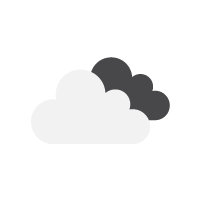

In [69]:
ans = get_temp(input("city name: "))
for key, value in ans.items():
    if 'icon' in key:
        continue
    print(f"{key:>30} = {value}")
Image(ans['icon_url'])

In [73]:
%%writefile openweather.py
import requests 

def get_lat_lon(city_name):
    """
        will return a dictionary having latitude and longitude info
    """
    api_key = "390cfe9366e31568d802a3982999caab"
    geo_url = f"http://api.openweathermap.org/geo/1.0/direct?q={city_name}&appid={api_key}"
    resp = requests.get(geo_url)
    if resp.status_code == 200:
        data = resp.json()
        if len(data) >= 1 and len(data[0]) >= 3:
            answer = {}
            answer["country"] = data[0]['country']
            answer["state"] = data[0]['state']
            if 'local_names' in data[0].keys():
                answer["name"] = data[0]['local_names']['hi']
            else:
                answer["name"] = data[0]['name']
            answer["lat"] = data[0]['lat']
            answer["lon"] = data[0]['lon']
            return answer
        else:
            print("Could not Get Data")
    else:
        print(f"Invalid Request! {resp.status_code}, {resp.reason}")
    return False

def get_temp(city_name):
    """
        will return temprature dictionary of city_name
    """
    info = get_lat_lon(city_name)
    api_key = "390cfe9366e31568d802a3982999caab"
    url = "https://api.openweathermap.org/data/2.5/weather"    
    if info:
        query_parameters = {
            "lat": info['lat'],
            "lon": info['lon'],
            "appid": api_key,
            "units": "metric"
        }
        resp = requests.get(url, params=query_parameters)
        if resp.status_code == 200:
            data = resp.json()
            if len(data) >= 3:
                info["desc"] = data["weather"][0]["description"]
                info["icon"] = data["weather"][0]["icon"]
                info["icon_url"] = f"https://openweathermap.org/img/wn/{info['icon']}@4x.png"
                info["temp"] = data["main"]["temp"]
                info["humidity"] = data["main"]['humidity']
                return info
            else:
                print("no weather information available")
        else:
            print(f"Could not fetch temprature! {resp.status_code} {resp.reason}")
    else:
        print("!Could Not get Lat and Lon, Please check location properly!")
    return False

if __name__ == "__main__":
    city = input("Enter city name: ")
    ans = get_temp(city)
    if ans:
        for key, value in ans.items():
            if 'icon' in key:
                continue
            print(f"{key:>30} = {value}")
    else:
        print("no data available")

Overwriting openweather.py


#### Task for Today Session

    Consume Place Search API of Google with Place Photos
    
    Create a Project using API that searches restaurent near you given latitude and longitude
    [hint: forsquare apis]
    
    Create a Project text to speech and also speech text using google apis 

##### Any doubt in Today Session 

`Flask Web Development`

### Virtual Environment
    
    